In [ ]:
plt.cm.RdBu

In [2]:
import numpy as np
import torch
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
cmap = plt.cm.RdBu
plt.style.use("dark_paper")

In [3]:
nsamples = int(1e5)
ntrain = 1000
xP = np.random.multivariate_normal([2,2],np.eye(2),nsamples)
xN = np.random.multivariate_normal([-2,-2],np.eye(2),nsamples)

y = np.concatenate((np.ones(nsamples),-np.ones(nsamples)))
x = np.concatenate((xP,xN))
mask = np.random.permutation(len(x))
xtrain = torch.from_numpy(x[mask][:ntrain]).float()
ytrain = torch.from_numpy(y[mask][:ntrain]).float().view(-1,1)
xval = torch.from_numpy(x[mask][ntrain:]).float()
yval = torch.from_numpy(y[mask][ntrain:]).float().view(-1,1)

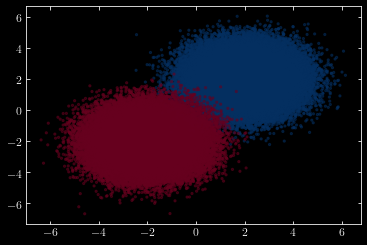

In [4]:
plt.scatter(*x.T,alpha=0.5,s=5,c=y,cmap=cmap)

In [ ]:
mlp = torch.nn.Sequential(torch.nn.Linear(2,3),
                          torch.nn.ReLU(),
                          torch.nn.Linear(3,1))
criterion = torch.nn.MSELoss(reduction="mean")
optimizer = torch.optim.SGD(mlp.parameters(),lr=1e-2)

In [ ]:
def train(model):
    model.train()
    yhat = model(xtrain)
    loss = criterion(yhat,ytrain.view(-1,1))
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return loss.item()
def validate(model):
    mlp.eval()
    with torch.no_grad():
        yhat = mlp(xval)
        loss = criterion(yhat,yval.view(-1,1))
        return loss.item()

In [ ]:
T = 10
losses = []
mlp.train()
for t in range(1,T+1):
    loss = train(mlp)
    losses.append(loss)
    print(f"Epoch {t:^02d}/{T:^2d} | Training loss: {loss:^.4f}") #,end="\r"

In [ ]:
mlp.eval()
with torch.no_grad():
    yhat = mlp(xval)
    loss = criterion(yhat,yval.view(-1,1)).item()
losses.append(loss)
print(f"Done! | Validation loss: {loss:^.4f}") #,end="\r"

In [ ]:
out = classification_report(yval.view(-1).numpy(),np.sign(yhat.view(-1).numpy()))
print(out)

In [ ]:
plt.hist(yhat[yval==1][:5000].numpy(),bins=50,alpha=0.5,color=cmap(0))
plt.hist(yhat[yval==-1][:5000].numpy(),bins=50,alpha=0.5,color=cmap(1))
plt.show()